In [1]:
from Gaussian import Gaussian
from EM import EM
from NN import NN
from Visual import Visual

import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = 2     # dimension of sample data point
K = 3     # number of Gaussian / classifications

# parameters for generating sample
#   prior probability, mu, and covariance
N_set = [np.random.randint(20000, 30000) for k in range(K-1)]
N_set.insert(0, int(sum(N_set)) )    # background
N_set = np.array(N_set)
mu_set = np.array([[0.0, 0.0],
                 [-1.0, 2.0],
                 [1.0, -2.0]])
cov_set = np.array([[[40., 0.0], [0.0, 40.]],
                  [[1.0, 0.5], [0.5, 0.5]],
                  [[0.5, 0.5], [0.5, 1.0]]])

# parameters for neural networks
neuron_1     = {0: K}
neuron_2_10  = {0: 10, 1: K}
neuron_2_100 = {0: 100, 1: K}
act_func_1 = {0: NN.softmax}
act_func_2 = {0: NN.relu, 1: NN.softmax}

In [3]:
# sample object
# all sample will store in this sample object
G = Gaussian(N_set, mu_set, cov_set)

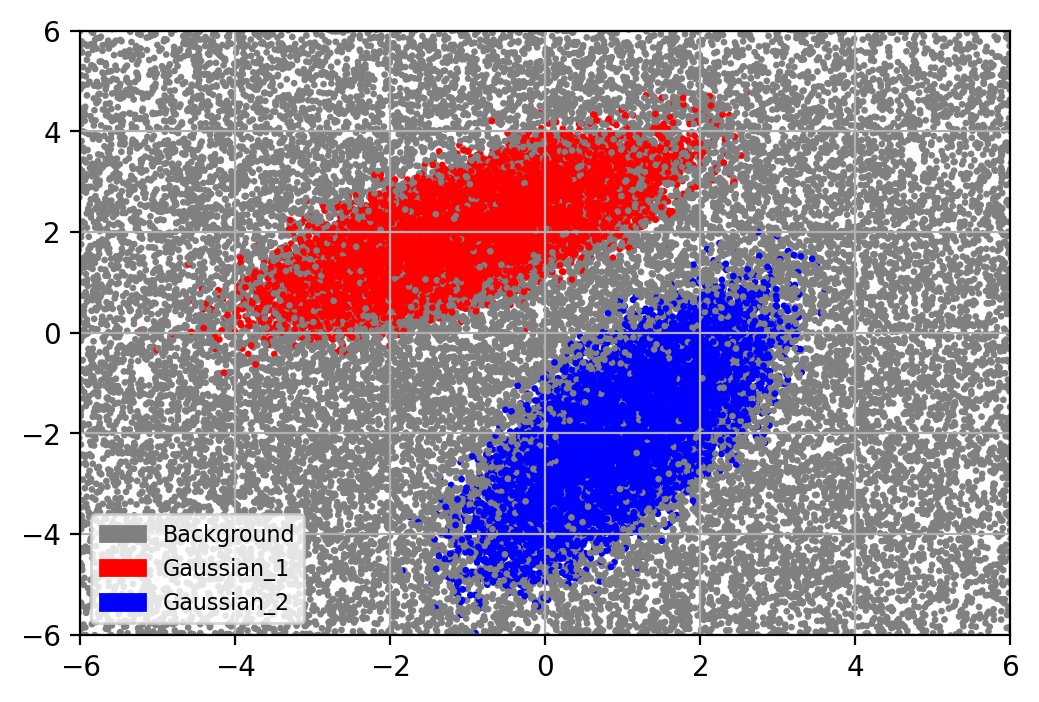

In [4]:
# initialize object visualization
visual = Visual(G.point, G.label, mu_set, cov_set)
visual.plot_sample().show()

Expectation-maximization (EM)

94.6089  0.3910


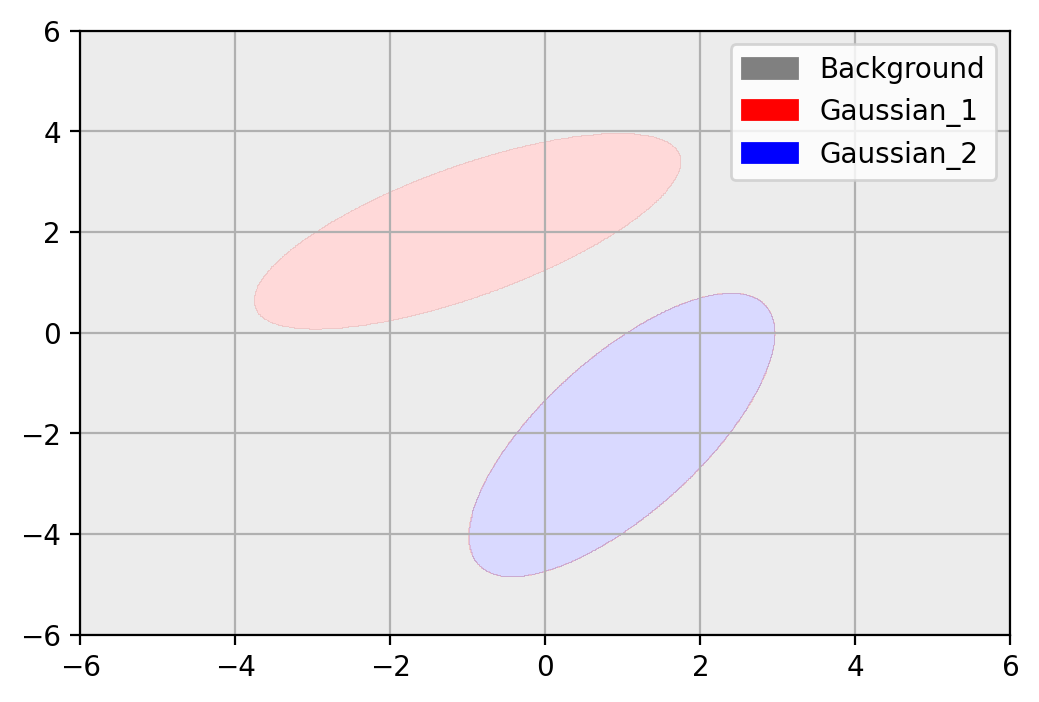

In [5]:
# train
method = EM(K)
method.train(G.train_point)
method.order_correction(G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
visual.plot_DB(method).show()

Quadratic Neural Network (2-3)

94.6001  23.2266


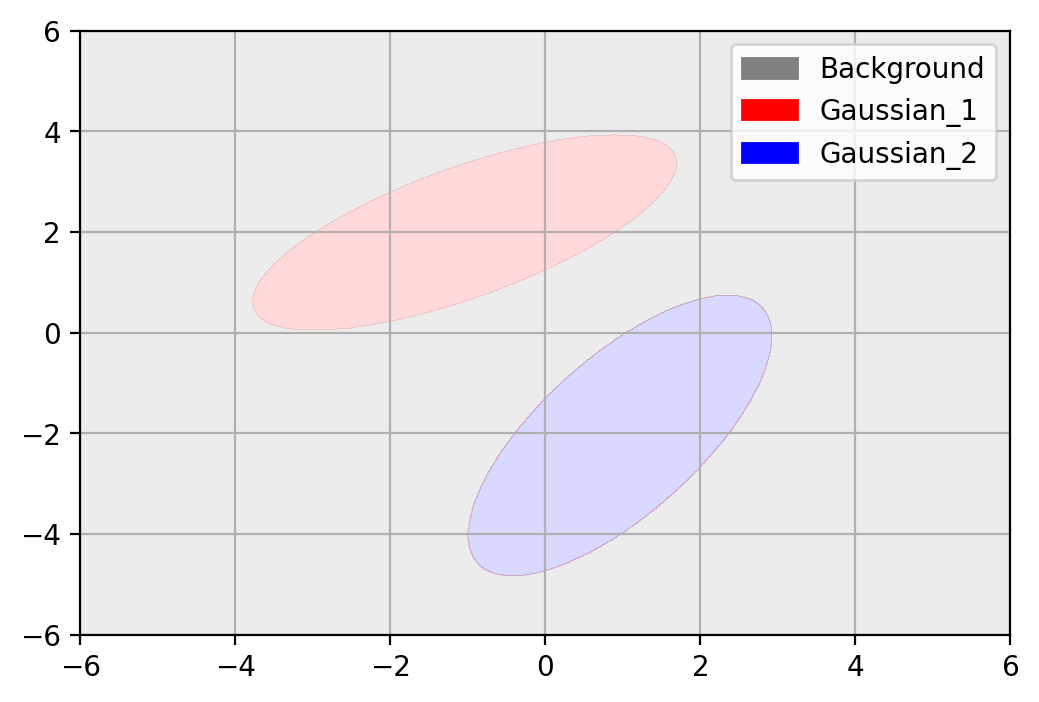

In [6]:
string = "Q(2-3)"

# train
method = NN(D, neuron_1, act_func_1, NN_type="QNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
visual.plot_DB(method).show()

# train process
a = method.valid_loss

Conventional Neural Network (2-3)

37.2351  1.7889


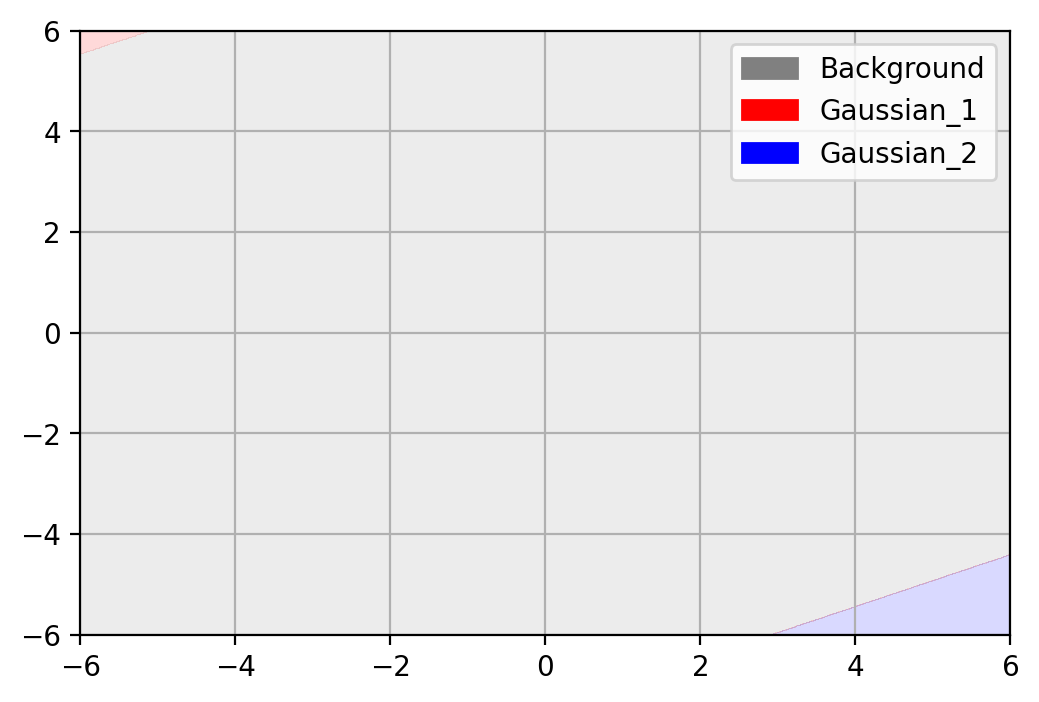

In [7]:
# train
method = NN(D, neuron_1, act_func_1, NN_type="LNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
visual.plot_DB(method).show()

# train process
b = method.valid_loss

Conventional Neural Network (2-10-3)

94.5236  26.5225


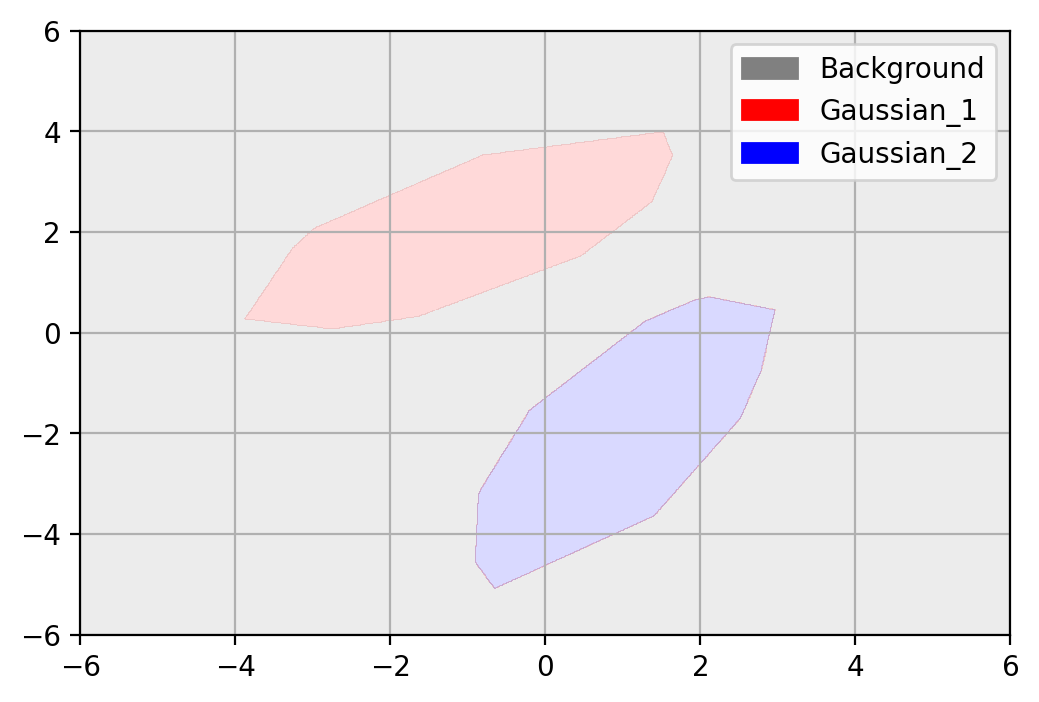

In [8]:
# train
method = NN(D, neuron_2_10, act_func_2, NN_type="LNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
visual.plot_DB(method).show()

# train process
c = method.valid_loss

Conventional Neural Network (2-100-3)

94.5560  215.9694


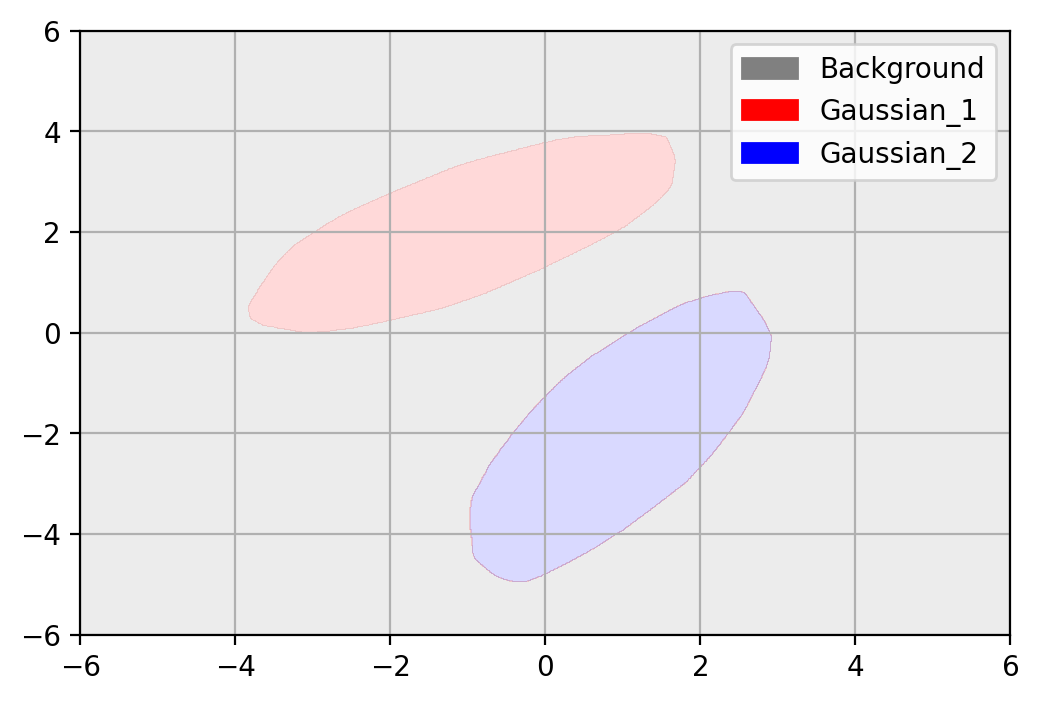

In [9]:
# train
method = NN(D, neuron_2_100, act_func_2, NN_type="LNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
visual.plot_DB(method).show()

# train process
d = method.valid_loss

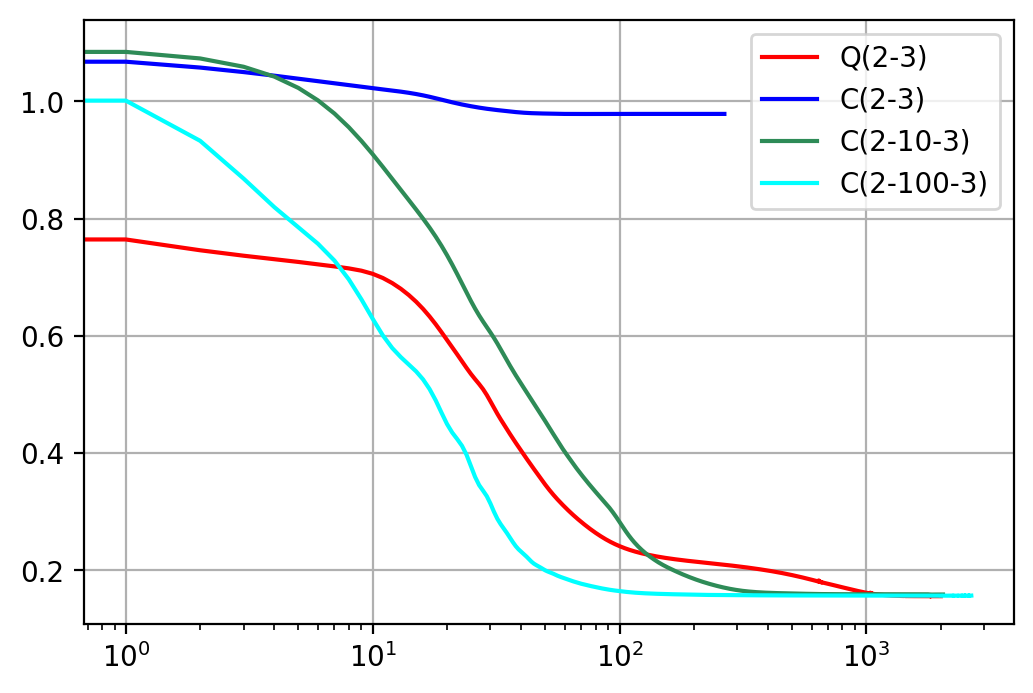

In [10]:
fig, ax = plt.subplots()
ax.plot(a, color = 'red',      label="Q(2-3)")
ax.plot(b, color = 'blue',     label="C(2-3)")
ax.plot(c, color = 'seagreen', label="C(2-10-3)")
ax.plot(d, color = 'cyan',     label="C(2-100-3)")
ax.set_xscale('log')
plt.legend()
plt.grid()
plt.show()